示例：产品维度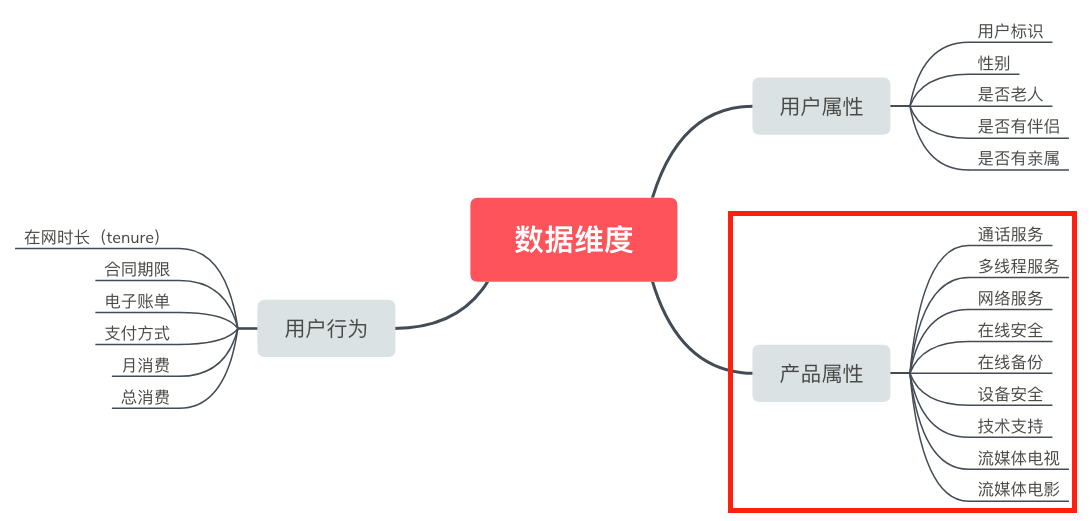

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
data.head()

,用户id,性别,是否老人,是否有伴侣,是否有亲属,在网时长,通话服务,多线程,网络服务,在线安全,...,设备安全,技术支持,流媒体电视,流媒体电影,合同期限,电子账单,支付方式,月消费,总消费,是否流失
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
length = len(data)

In [5]:
length

7043

In [6]:
df_churn = data[data['是否流失']=='Yes']
df_churn

,用户id,性别,是否老人,是否有伴侣,是否有亲属,在网时长,通话服务,多线程,网络服务,在线安全,...,设备安全,技术支持,流媒体电视,流媒体电影,合同期限,电子账单,支付方式,月消费,总消费,是否流失
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,1699-HPSBG,Male,0,No,No,12,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Electronic check,59.80,727.8,Yes
7026,8775-CEBBJ,Female,0,No,No,9,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,Yes
7032,6894-LFHLY,Male,1,No,No,1,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes


In [7]:
# 4.5.1 创建通用函数：计算类别数据对应条数、占总数比例、对应流失率

In [8]:
def eda_calculate(column, types):
    """
    计算类别数据对应条数、占总数比例、对应流失率
    param @column: str，列表
    param @types: list，类别数据
    """
    print("\n==========当前列标签：", column, types)
    
    # 1.计算类别数据对应的个数
    res_list = []
    rate_list = []
    for t in types:
        res = len(data[data[column]==t])
        # 3.计算类别数据对应的流失率
        rate = len(df_churn[df_churn[column]==t]) / res
        
        # 存储到字典，方便匹配信息
        res_list.append({t: res}) 
        rate_list.append({t: rate}) 
    
    # 2.预览各类别数据对应的个数、占总数比例
    print("********数据条数********")
    for res in res_list: # res = {男 ：3400}
        print(res, "占总数比例", list(res.values())[0] / length)

    # 4.预览个类别数据对应的流失率、前者和后者的倍数关系
    print("********流失率********")
    for rate in rate_list:        
        before = list(rate.values())[0]
        index = rate_list.index(rate) + 1
        print(rate)
        
        if index < len(rate_list):
            after = list(rate_list[index].values())[0]
            print("前者和后者的倍数关系", before / after)

    

In [9]:
eda_calculate(column='是否老人', types=[0,1])


==========当前列标签： 是否老人 [0, 1]
********数据条数********
{0: 5901} 占总数比例 0.8378531875621185
{1: 1142} 占总数比例 0.1621468124378816
********流失率********
{0: 0.23606168446026096}
前者和后者的倍数关系 0.5663496715412143
{1: 0.4168126094570928}


In [10]:
# 4.5.2 创建通用函数：提取列标签、提取对应类别数据

In [11]:
columns = ['通话服务','多线程','网络服务','在线安全','在线备份',
           '设备安全', '技术支持', '流媒体电视','流媒体电影']

In [12]:
for c in columns:
    types = data[c].drop_duplicates().tolist()
    print(c, types)

通话服务 ['No', 'Yes']
多线程 ['No phone service', 'No', 'Yes']
网络服务 ['DSL', 'Fiber optic', 'No']
在线安全 ['No', 'Yes', 'No internet service']
在线备份 ['Yes', 'No', 'No internet service']
设备安全 ['No', 'Yes', 'No internet service']
技术支持 ['No', 'Yes', 'No internet service']
流媒体电视 ['No', 'Yes', 'No internet service']
流媒体电影 ['No', 'Yes', 'No internet service']


In [13]:
# 4.5.3 函数应用：快速计算特征指标

In [14]:
for c in columns:
    types = data[c].drop_duplicates().tolist()
    eda_calculate(c,types)


==========当前列标签： 通话服务 ['No', 'Yes']
********数据条数********
{'No': 682} 占总数比例 0.09683373562402385
{'Yes': 6361} 占总数比例 0.9031662643759761
********流失率********
{'No': 0.24926686217008798}
前者和后者的倍数关系 0.9332469159881869
{'Yes': 0.2670963684955196}

==========当前列标签： 多线程 ['No phone service', 'No', 'Yes']
********数据条数********
{'No phone service': 682} 占总数比例 0.09683373562402385
{'No': 3390} 占总数比例 0.48132897912821243
{'Yes': 2971} 占总数比例 0.42183728524776376
********流失率********
{'No phone service': 0.24926686217008798}
前者和后者的倍数关系 0.9953058454141323
{'No': 0.2504424778761062}
前者和后者的倍数关系 0.8753701197293076
{'Yes': 0.286098956580276}

==========当前列标签： 网络服务 ['DSL', 'Fiber optic', 'No']
********数据条数********
{'DSL': 2421} 占总数比例 0.34374556297032516
{'Fiber optic': 3096} 占总数比例 0.4395854039471816
{'No': 1526} 占总数比例 0.21666903308249325
********流失率********
{'DSL': 0.1895910780669145}
前者和后者的倍数关系 0.4525628201196355
{'Fiber optic': 0.4189276485788114}
前者和后者的倍数关系 5.657376917975807
{'No': 0.07404980340760157}

====

In [15]:
# 4.5.4 数据洞察

In [8]:
# 高流失率的产品属性特征（服务开通情况）
# 1. 没有明显相关性的产品服务：
#     通话服务、多线程：流失率在25%左右
#     流媒体电视、流媒体电影：流失率在30%左右
# 2. 有明显影响的产品服务：就是和网络相关的增值服务
#     网络服务：光纤用户的流失率41%，是DSL的2倍多
#     在线安全：没有选择这项服务的流失率41%+，是选择的用户的2.85倍
#     在线备份：没有选择这项服务的用户，流失率比选择的高1.5倍+
#     设备安全：同上
#     技术支持：没有选择这项服务的流失率41%+，是选择的用户的2.74倍